## DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data

data = pd.read_csv('adult_with_headers.csv')
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.shape

(32561, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# to check missing values
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

- in Table(excel sheet ) we Observed few are marked with '?'
- replace with NaN

In [6]:
data.replace('?', np.nan, inplace=True)
data.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [7]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [8]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
# Deviding the Numerical & Categorical separate

num_data = data.select_dtypes(include='number')
cat_data = data.select_dtypes(include='object')

In [10]:
num_data.head(3)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40


In [11]:
cat_data.head(3)

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K


In [12]:
# checking missing & Handle Null values

#impute nuerical column with median 

num_data.fillna(num_data.median(), inplace=True)

In [13]:
# categorical column for mode

cat_data.fillna(cat_data.mode(), inplace=True)

In [14]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

# Scaling Numerical Features

### Standard scaling

- Centers data around mean = 0
- Scales to unit variance
- Best for: Logistic Regression, SVM, PCA

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_num = scaler.fit_transform(num_data)
scaled_num = pd.DataFrame(scaled_num, columns=num_data.columns)
scaled_num.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


### Min-Max scaling

- Scales features to [0,1]
- Preserves original distribution
- Best for: Neural Networks, KNN

In [16]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
mm_scaler_cat = mm_scaler.fit_transform(num_data)
mm_scaler_cat = pd.DataFrame(mm_scaler_cat, columns=num_data.columns)
mm_scaler_cat.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


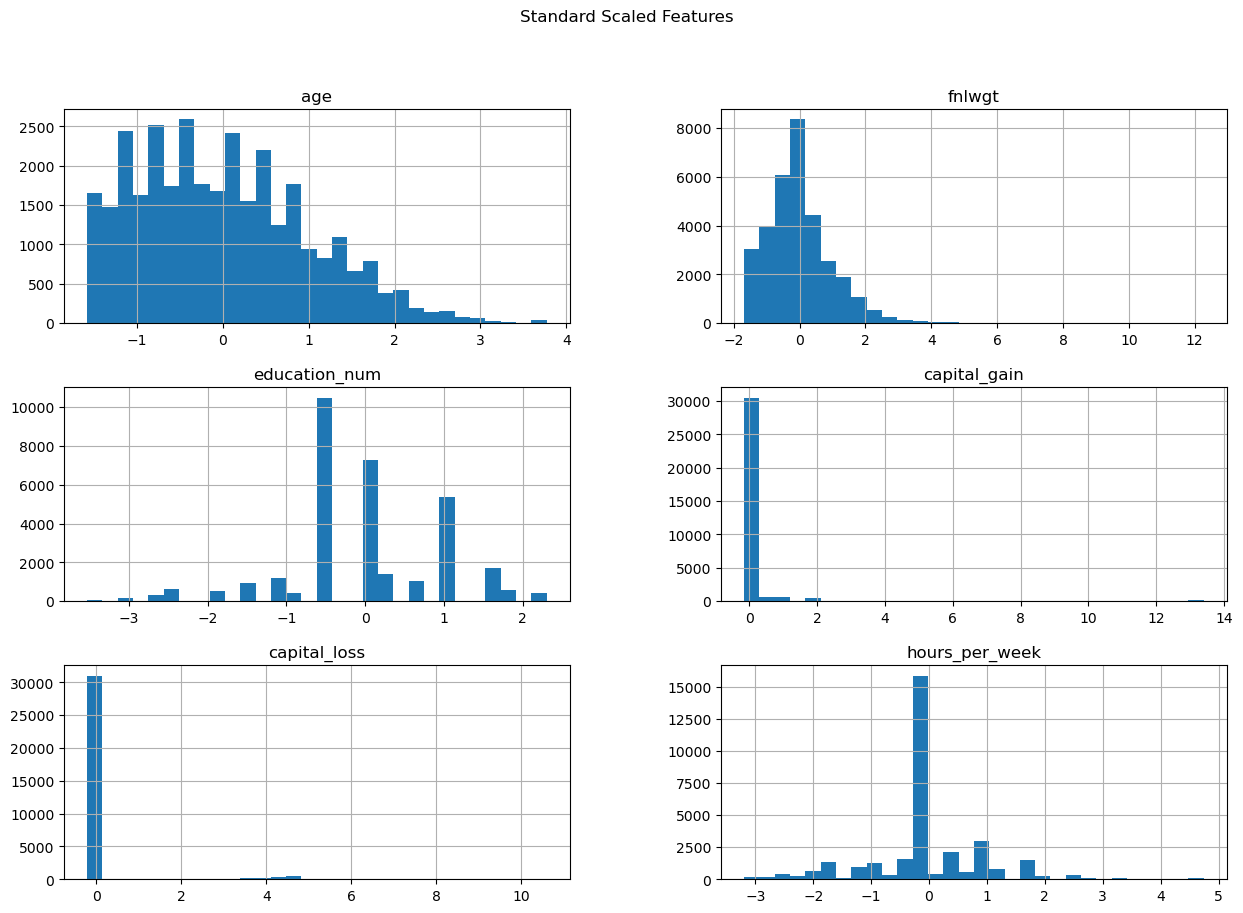

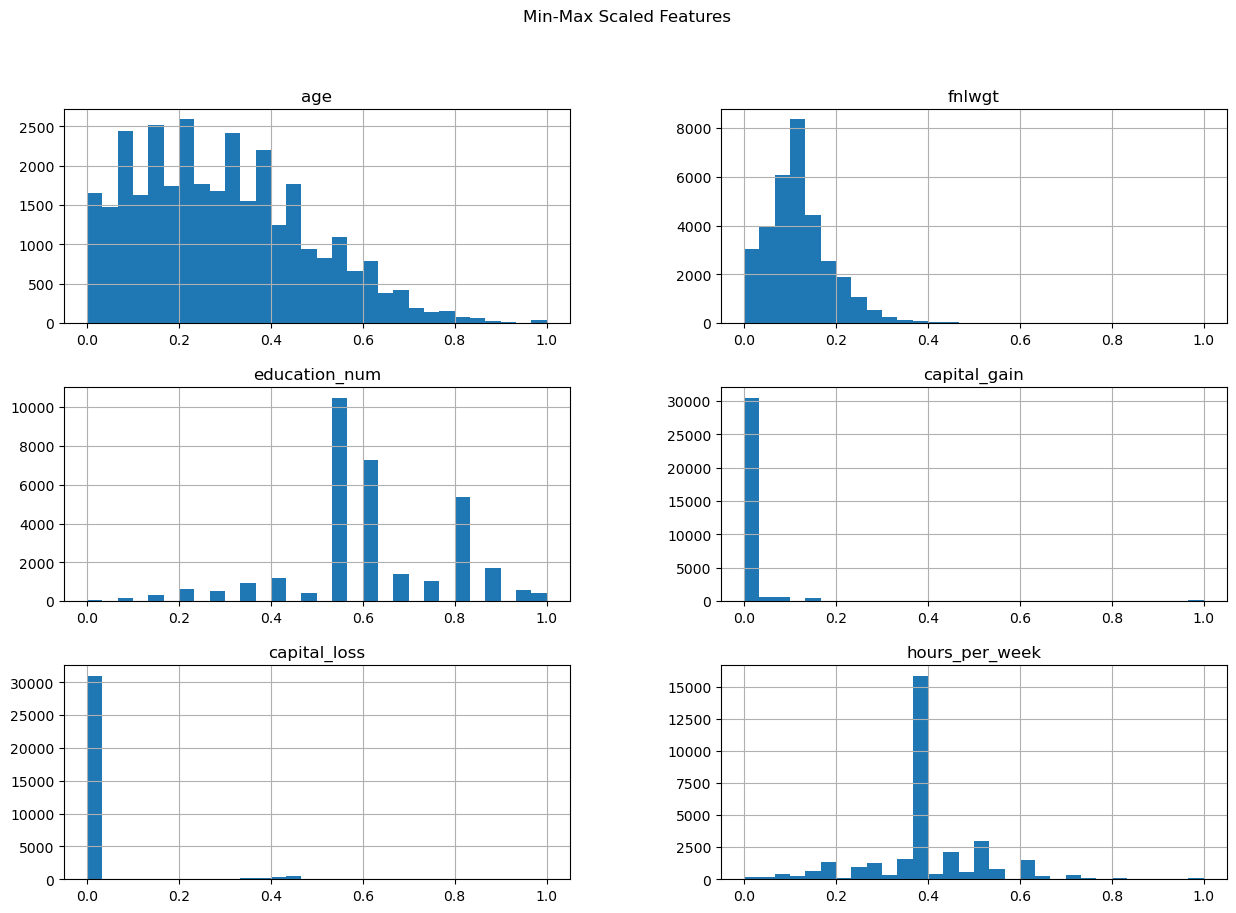

In [17]:
## Comparing both, with visualization difference

scaled_num.hist(figsize=(15,10), bins=30)
plt.suptitle("Standard Scaled Features")
plt.show()

mm_scaler_cat.hist(figsize=(15,10), bins=30)
plt.suptitle("Min-Max Scaled Features")
plt.show()


# Encoding Categorical Features

#### Encoding : ML models only understand numbers, not text.

In [18]:
# categoricl data

cat_data.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


### Label Encoding

- Label Encoding assigns integers (0, 1, 2...) to categories.
- suitable for ordinal data (like Low, Medium, High)
- For nominal (unordered) data (e.g., colors), it creates an artificial order (Red=0,       Green=1, Blue=2), which can confuse models.
- Ordinal (or target)
- Implies order for nominal data

In [19]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

LE_cat = cat_data.apply(lambda col:LE.fit_transform(col))
LE_cat = pd.DataFrame(LE_cat, columns=cat_data.columns)
LE_cat.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,7,9,4,1,1,4,1,39,0
1,6,9,2,4,0,4,1,39,0
2,4,11,0,6,1,4,1,39,0
3,4,1,2,6,0,2,1,39,0
4,4,9,2,10,5,2,0,5,0


In [20]:
## Another way for LE

# for col in cat_data.columns:
#    if cat_data[col].dtype == 'object':
#        cat_data[col] = LE.fit_transform(cat_data[col])

#  cat_data.head()

### Ordinal Encoding

- Similar to Label Encoding but specifically maps categories to integers based on their inherent rank.  

- Ordinal features where order is known (e.g., Low=1, Med=2, High=3)
- Ordinal (ordered)
- Less common term; essentially ordered Label Encoding

In [21]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()

OE_cat = OE.fit_transform(cat_data)
OE_cat = pd.DataFrame(OE_cat, columns=cat_data.columns)
OE_cat.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,7.0,9.0,4.0,1.0,1.0,4.0,1.0,39.0,0.0
1,6.0,9.0,2.0,4.0,0.0,4.0,1.0,39.0,0.0
2,4.0,11.0,0.0,6.0,1.0,4.0,1.0,39.0,0.0
3,4.0,1.0,2.0,6.0,0.0,2.0,1.0,39.0,0.0
4,4.0,9.0,2.0,10.0,5.0,2.0,0.0,5.0,0.0


### One Hot Encoding

- One-Hot Encoding Creates a new binary (0 or 1) column for each unique category.
- best for nominal data to avoid false order but increases dimensionality.
- Nominal (unordered), where there is no order.
- Multiple columns, Binary (0, 1)
- High dimensionality (curse of dimensionality)

In [22]:
from sklearn.preprocessing import OneHotEncoder

OHE = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

OHE_cat = OHE.fit_transform(cat_data)
OHE_cat = pd.DataFrame(OHE_cat, columns=OHE.get_feature_names_out(cat_data.columns))
OHE_cat.head()

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ <=50K,income_ >50K
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#####	Apply One-Hot Encoding to categorical variables with less than 5 categories

In [23]:
cat_data_unique = cat_data.nunique()
cat_data_unique

workclass          9
education         16
marital_status     7
occupation        15
relationship       6
race               5
sex                2
native_country    42
income             2
dtype: int64

In [24]:
cat_data_unique_5 = cat_data_unique[cat_data_unique <=5].index
cat_data_unique_5

Index(['race', 'sex', 'income'], dtype='object')

In [25]:
cat_5 = cat_data[cat_data_unique_5]
cat_5.head()

,race,sex,income
0,White,Male,<=50K
1,White,Male,<=50K
2,White,Male,<=50K
3,Black,Male,<=50K
4,Black,Female,<=50K


In [26]:
OHE = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

OHE_cat_5 = OHE.fit_transform(cat_5)
OHE_cat_5 = pd.DataFrame(OHE_cat_5, columns=OHE.get_feature_names_out(cat_5.columns))
OHE_cat_5.head()

,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


## Final Data set

In [27]:
final_data_SS = pd.concat([scaled_num,LE_cat], axis=1)
final_data_SS.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,7,9,4,1,1,4,1,39,0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,6,9,2,4,0,4,1,39,0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,4,11,0,6,1,4,1,39,0
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,4,1,2,6,0,2,1,39,0
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,4,9,2,10,5,2,0,5,0


In [28]:
final_data_MM = pd.concat([mm_scaler_cat,LE_cat], axis=1)
final_data_MM.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959,7,9,4,1,1,4,1,39,0
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449,6,9,2,4,0,4,1,39,0
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959,4,11,0,6,1,4,1,39,0
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959,4,1,2,6,0,2,1,39,0
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959,4,9,2,10,5,2,0,5,0


## Feature Engineering (Create New Features)

##### feature Engineering: 
        It helps the model learn better patterns by creating more meaningful inputs from existing data.

### Feature-1 : capital_net

Combine capital_gain and capital_loss into one feature

In [29]:
final_data_SS['capital_net'] = final_data_SS['capital_gain'] - final_data_SS['capital_loss']
final_data_SS.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income,capital_net
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,7,9,4,1,1,4,1,39,0,0.365112
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,6,9,2,4,0,4,1,39,0,0.070739
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,4,11,0,6,1,4,1,39,0,0.070739
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,4,1,2,6,0,2,1,39,0,0.070739
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,4,9,2,10,5,2,0,5,0,0.070739


In [30]:
final_data_MM['capital_net'] = final_data_MM['capital_gain'] - final_data_MM['capital_loss']
final_data_MM.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income,capital_net
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959,7,9,4,1,1,4,1,39,0,0.02174
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449,6,9,2,4,0,4,1,39,0,0.00000
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959,4,11,0,6,1,4,1,39,0,0.00000
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959,4,1,2,6,0,2,1,39,0,0.00000
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959,4,9,2,10,5,2,0,5,0,0.00000


### Feature-2 : hours_per_week_category

Convert continuous working hours into work intensity groups.

In [31]:
final_data_SS["hours_category"] = (final_data_SS["hours_per_week"] > 0).astype(int)
final_data_SS.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income,capital_net,hours_category
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,7,9,4,1,1,4,1,39,0,0.365112,0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,6,9,2,4,0,4,1,39,0,0.070739,0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,4,11,0,6,1,4,1,39,0,0.070739,0
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,4,1,2,6,0,2,1,39,0,0.070739,0
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,4,9,2,10,5,2,0,5,0,0.070739,0


In [32]:
final_data_MM["hours_category"] = (final_data_MM["hours_per_week"] > 0).astype(int)
final_data_MM.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income,capital_net,hours_category
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959,7,9,4,1,1,4,1,39,0,0.02174,1
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449,6,9,2,4,0,4,1,39,0,0.00000,1
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959,4,11,0,6,1,4,1,39,0,0.00000,1
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959,4,1,2,6,0,2,1,39,0,0.00000,1
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959,4,9,2,10,5,2,0,5,0,0.00000,1


## Feature Transformation (Log Transformation)

Apply log transformation to reduce skewness.

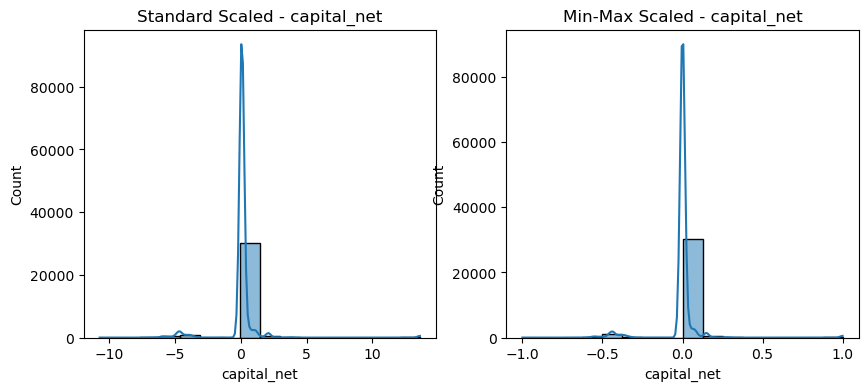

In [33]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(final_data_SS['capital_net'], kde=True)
plt.title("Standard Scaled - capital_net")

plt.subplot(1,2,2)
sns.histplot(final_data_MM['capital_net'], kde=True)
plt.title("Min-Max Scaled - capital_net")

plt.show()

# using log1p

- Handles zero values safely
- Makes distribution more balanced
- Improves performance of linear models

In [34]:
final_data_SS["capital_gain_log"] = np.log1p(final_data_SS["capital_gain"])
final_data_SS.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income,capital_net,hours_category,capital_gain_log
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,7,9,4,1,1,4,1,39,0,0.365112,0,0.138416
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,6,9,2,4,0,4,1,39,0,0.070739,0,-0.157731
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,4,11,0,6,1,4,1,39,0,0.070739,0,-0.157731
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,4,1,2,6,0,2,1,39,0,0.070739,0,-0.157731
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,4,9,2,10,5,2,0,5,0,0.070739,0,-0.157731


In [35]:
final_data_MM["capital_gain_log"] = np.log1p(final_data_MM["capital_gain"])
final_data_MM.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income,capital_net,hours_category,capital_gain_log
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959,7,9,4,1,1,4,1,39,0,0.02174,1,0.021507
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449,6,9,2,4,0,4,1,39,0,0.00000,1,0.000000
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959,4,11,0,6,1,4,1,39,0,0.00000,1,0.000000
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959,4,1,2,6,0,2,1,39,0,0.00000,1,0.000000
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959,4,9,2,10,5,2,0,5,0,0.00000,1,0.000000


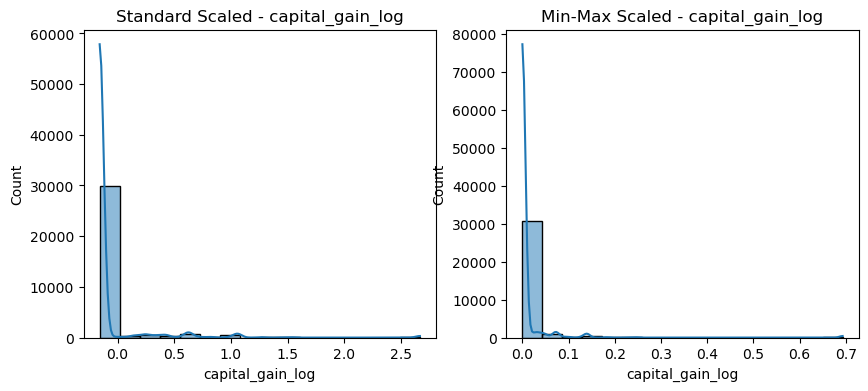

In [36]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(final_data_SS['capital_gain_log'], kde=True)
plt.title("Standard Scaled - capital_gain_log")

plt.subplot(1,2,2)
sns.histplot(final_data_MM['capital_gain_log'], kde=True)
plt.title("Min-Max Scaled - capital_gain_log")

plt.show()